Корни (бисекция): [-3.68096923828125, -2.32025146484375, -1.08599853515625]
Корни (Ньютона): [-3.680987743444374, -2.320204273487637, -1.0859826225763025]


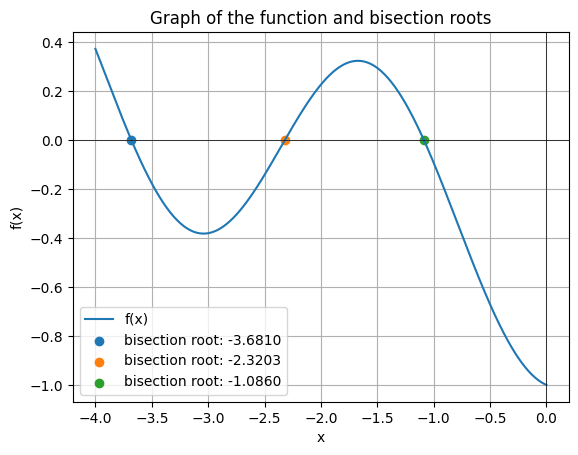

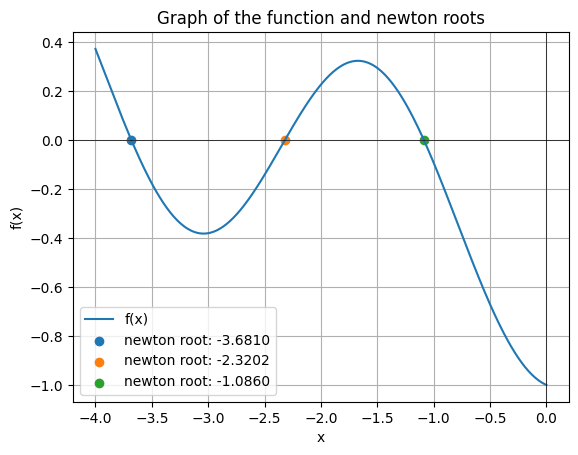

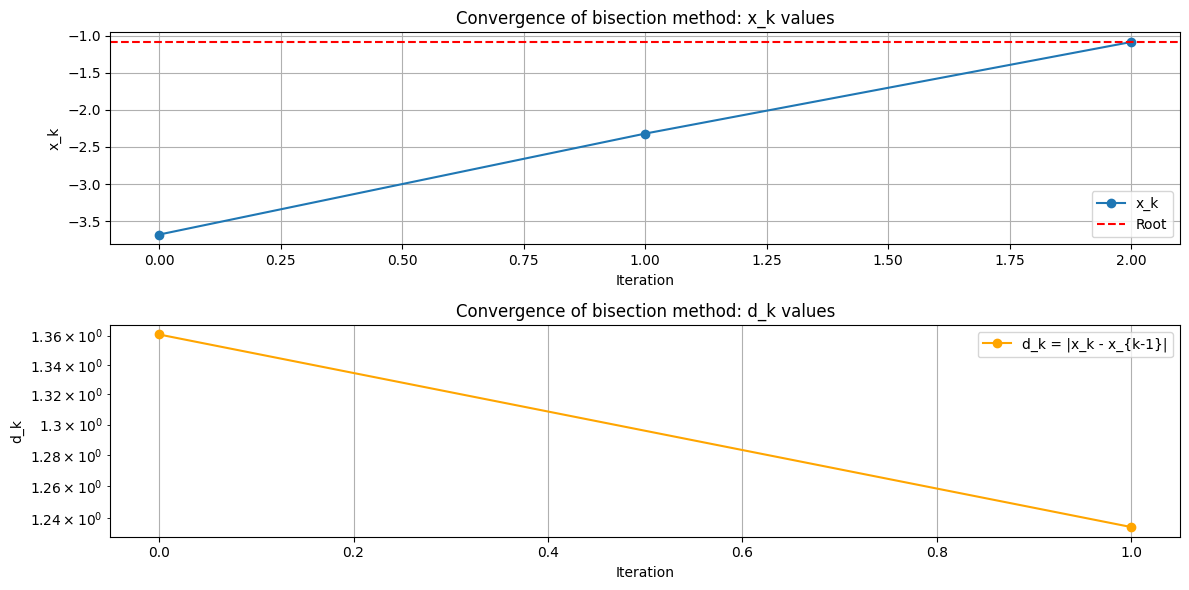

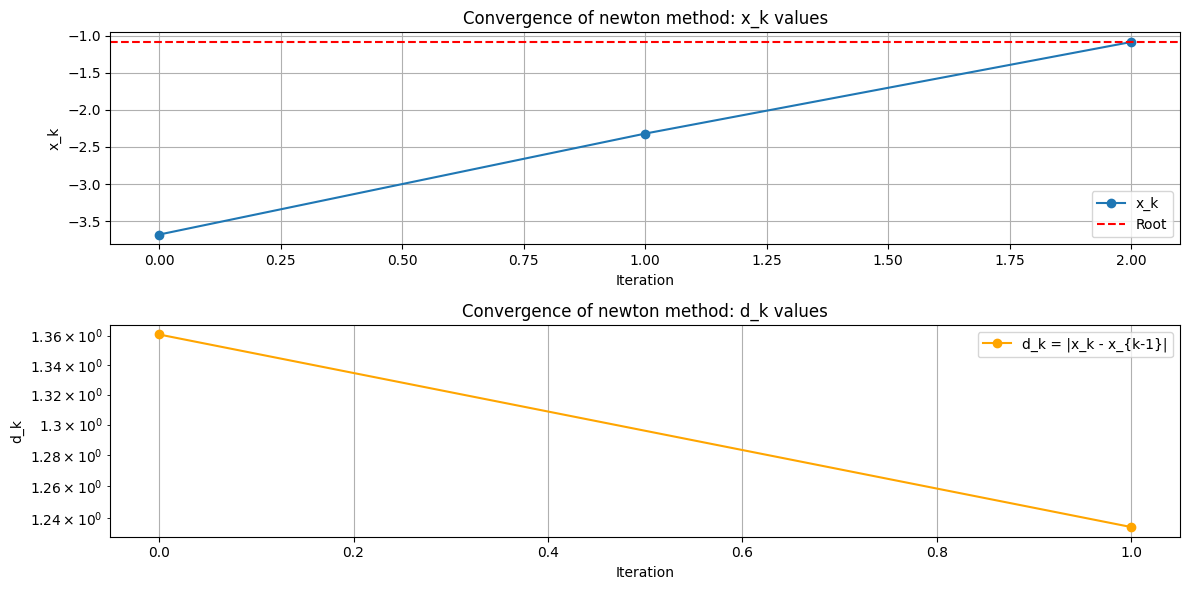

In [37]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
from sympy.abc import x

# Задаём полином
base_poly = sp.poly(sp.sin(x)**2 - x/5 - 1)

# Основная программа
left_border = -4
right_border = 0

# Преобразуем полином в функцию
poly_func = sp.lambdify(x, base_poly.as_expr(), 'numpy')

# Функция для нахождения всех корней на интервале с использованием метода бисекции
def find_all_roots_bisect(poly_func, left_border, right_border, accuracy, step=0.5):
    roots = []
    xk_values = []  # Для хранения последовательности x_k
    dk_values = []  # Для хранения значений d_k
    current = left_border
    
    while current < right_border:
        next_point = current + step
        
        # Проверка на изменение знака
        if poly_func(current) * poly_func(next_point) <= 0:
            root = bisect(poly_func, current, next_point, xtol=accuracy)
            roots.append(root)  # Добавляем найденный корень
            xk_values.append(root)  # Сохраняем найденный корень
            
            # Добавление d_k (разности) в dk_values
            if len(xk_values) > 1:
                dk_values.append(abs(xk_values[-1] - xk_values[-2]))
        
        current = next_point
        
    return roots, xk_values, dk_values

# Функция для нахождения всех корней с использованием метода Ньютона
def find_all_roots_newton(poly_func, left_border, right_border, accuracy, step=0.5):
    roots = []
    xk_values = []  # Для хранения последовательности x_k
    dk_values = []  # Для хранения значений d_k
    current = left_border
    
    while current < right_border:
        next_point = current + step
        
        # Проверка на изменение знака
        if poly_func(current) * poly_func(next_point) <= 0:
            # Начальная точка для метода Ньютона — середина отрезка
            initial_guess = (current + next_point) / 2
            root, result = newton(poly_func, initial_guess, tol=accuracy, full_output=True)

            roots.append(root)  # Добавляем найденный корень
            xk_values.append(root)  # Сохраняем найденный корень
            
            # Добавление d_k (разности) в dk_values
            if len(xk_values) > 1:
                dk_values.append(abs(xk_values[-1] - xk_values[-2]))
        
        current = next_point
        
    return roots, xk_values, dk_values

# Функция для отображения графика и точек
def plot_with_points(poly_func, left_border, right_border, roots, method):
    # Создание массива точек для графика
    x_vals = np.linspace(left_border, right_border, 400)
    y_vals = poly_func(x_vals)

    # Отрисовка графика
    plt.plot(x_vals, y_vals, label='f(x)')

    # Добавляем найденные корни как точки
    for root in roots:
        plt.scatter(root, poly_func(root), label=f'{method} root: {root:.4f}')

    # Настройки графика
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'Graph of the function and {method} roots')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Функция для построения графика сходимости
def plot_convergence(xk_values, dk_values, method):
    plt.figure(figsize=(12, 6))

    # График x_k
    plt.subplot(2, 1, 1)
    plt.plot(xk_values, label='x_k', marker='o')
    plt.title(f'Convergence of {method} method: x_k values')
    plt.xlabel('Iteration')
    plt.ylabel('x_k')
    plt.axhline(y=xk_values[-1], color='r', linestyle='--', label='Root')
    plt.legend()
    plt.grid(True)

    # График d_k
    plt.subplot(2, 1, 2)
    plt.plot(dk_values, label='d_k = |x_k - x_{k-1}|', marker='o', color='orange')
    plt.title(f'Convergence of {method} method: d_k values')
    plt.xlabel('Iteration')
    plt.ylabel('d_k')
    plt.yscale('log')  # Логарифмическая шкала для d_k
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Нахождение всех корней методом бисекции
bisection_roots, bisection_xk_values, bisection_dk_values = find_all_roots_bisect(poly_func, left_border, right_border, 1e-4)
print(f'Корни (бисекция): {bisection_roots}')

# Нахождение всех корней методом Ньютона
newton_roots, newton_xk_values, newton_dk_values = find_all_roots_newton(poly_func, left_border, right_border, 1e-4)
print(f'Корни (Ньютона): {newton_roots}')

# Отображение графиков для каждого метода
plot_with_points(poly_func, left_border, right_border, bisection_roots, 'bisection')
plot_with_points(poly_func, left_border, right_border, newton_roots, 'newton')

# Отображение графиков сходимости
plot_convergence(bisection_xk_values, bisection_dk_values, 'bisection')
plot_convergence(newton_xk_values, newton_dk_values, 'newton')
